

# Project: Investigate TMPD Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
 

 

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

firstly,I load data and make a look on the contents.
then showing some information about the dataset like data type.





In [22]:
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [24]:
df.shape

(10866, 21)

dataset consists of 10866 entries(number of movies) and 21 columns

In [25]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


budget mean for movies is 1.462570e+07 ,maxiumum budget is 4.250000e+08 , revenue mean for movies is 3.982332e+07 and maximum revenue is 2.781506e+09


### Data Cleaning
I will drop columns that I will not use . then removing rows which contain null values and removing any duplicated rows.
 

In [26]:
#dropping rows which i willnot use
df.drop(['id','imdb_id','homepage','tagline','overview','keywords'],axis=1,inplace=True)
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


I delete unnecessary columns which willnot affect our analysis like id , tagline

In [27]:
#drop rows with missing values
df.dropna(inplace=True)
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [28]:
#discover if there is any duplicated rows
df.duplicated().sum()

1

number of duplicated rows =1

In [29]:
#drop dulicated rows
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

After dropping duplicated rows sum of duplicated rows become 0

<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 (Is there is a relationship between budget and revenue?)

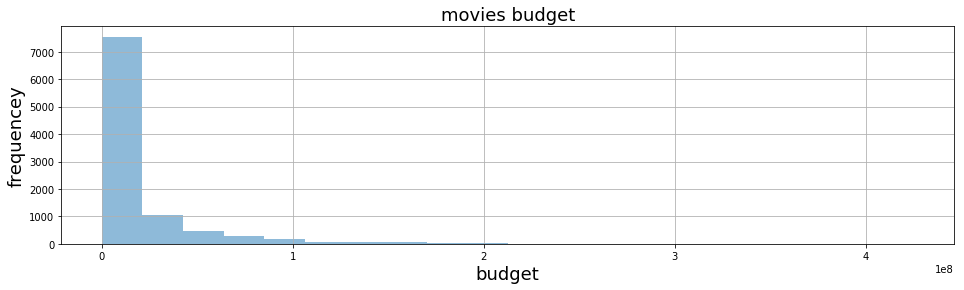

In [30]:
#exploring budget 
def hist_plot_by(df,col_name):
    plt.figure(figsize=[16,4])
    df[col_name].hist(alpha=0.5,bins=20);
    plt.title('movies budget',fontsize=18)
    plt.xlabel('budget',fontsize=18)
    plt.ylabel('frequencey',fontsize=18);
hist_plot_by(df,'budget')    

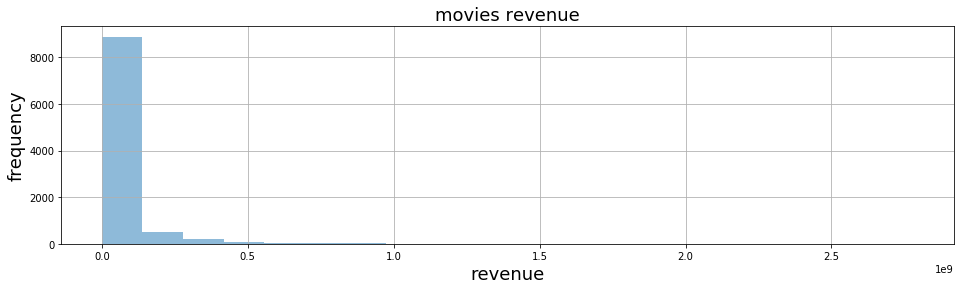

In [31]:
#exploring revenue
def plot_by_hist(df,col_name):
    plt.figure(figsize=[16,4])
    df[col_name].hist(alpha=0.5,bins=20);
    plt.title('movies revenue',fontsize=18)
    plt.xlabel('revenue',fontsize=18)
    plt.ylabel('frequency',fontsize=18);
plot_by_hist(df,'revenue')

histograms for  budget and revenue look similar 

Text(0,0.5,'revenue')

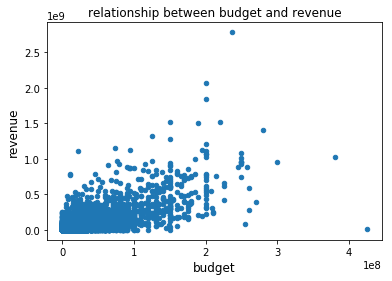

In [32]:
#exploring relationship between budget and revenue 
df.plot(x='budget',y='revenue',kind='scatter');
plt.title('relationship between budget and revenue',fontsize=12);
plt.xlabel('budget',fontsize=12)
plt.ylabel('revenue',fontsize=12)
  

the plot reflects a positive corrolation between revenue and budget which means that when budget increases revenue often icreases too

### Research Question 2  (Do genres affect revenue?)

In [33]:
#first we need to add new column that contains the first part of genres 
new=df['genres'].str.split('|',n=1,expand=True)
df['genres_first']=new[0]
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_first
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action


adding new column (genres_first) makes it more easy to disover relationship between genres in general and revenue

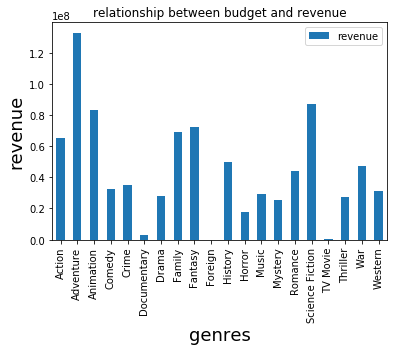

In [34]:
#exploring relationship between genres in general and revenue
df.groupby('genres_first').revenue.mean().plot(kind='bar')
plt.xlabel('genres',fontsize=18)
plt.ylabel('revenue',fontsize=18)
plt.title('relationship between budget and revenue')
plt.legend();

plot refers to revenues of different types of genres,as shown above adventure movies have the highest revenues

Research Question 3 (Do popularity and genres both affect revenue?)

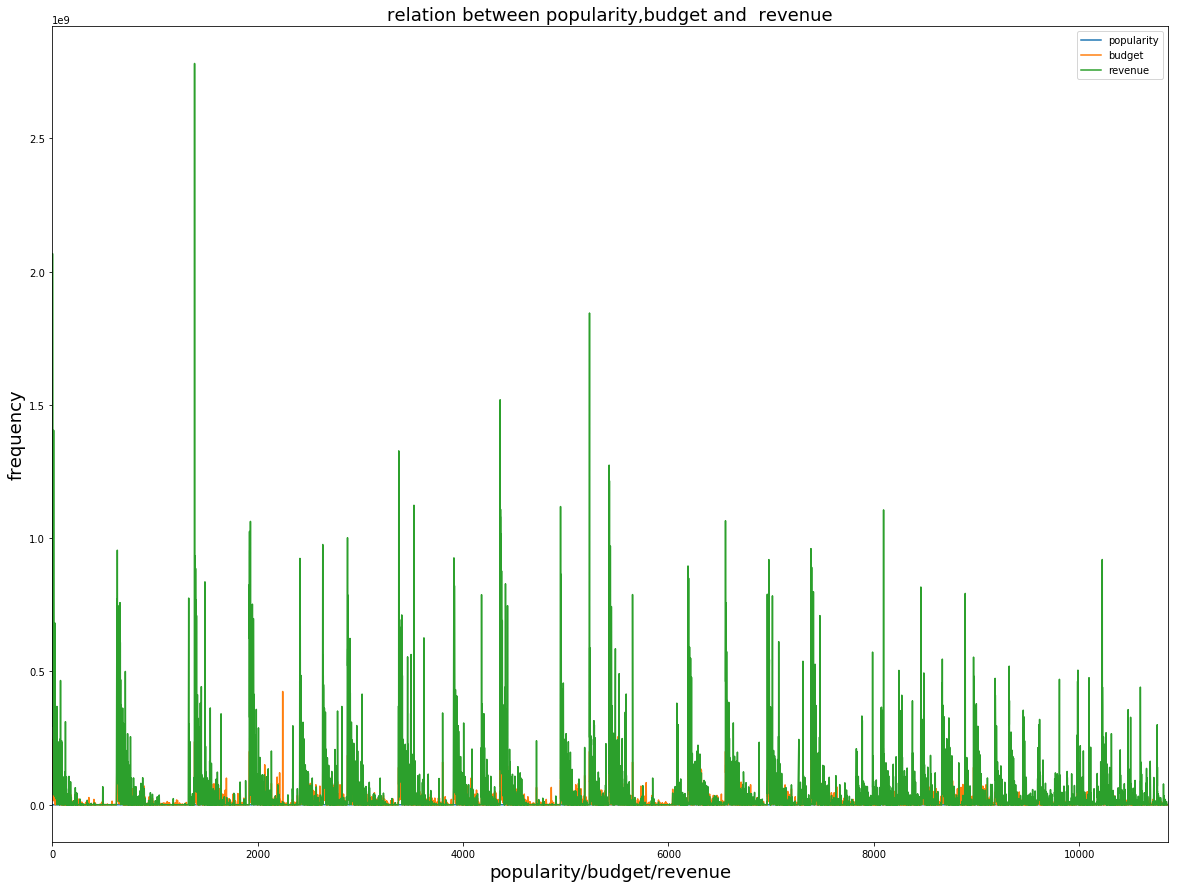

In [35]:
#exploring relationship between popularity,budget and revenue 
df[['popularity','budget','revenue']].plot(figsize=(20,15));
plt.legend();
plt.title('relation between popularity,budget and  revenue',fontsize=18)
plt.xlabel('popularity/budget/revenue',fontsize=18)
plt.ylabel('frequency',fontsize=18);

The plot above refers that popularity,budget and revenue ofently rise together.

Research Question 4(What is the most type of movies produced  over time?) 

Text(0.5,0,'frequency')

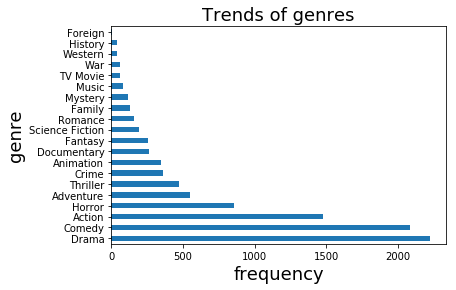

In [36]:
#exploring frequency of genres
df['genres_first'].value_counts().plot(kind='barh')
plt.title('Trends of genres',fontsize=18)
plt.ylabel('genre',fontsize=18)
plt.xlabel('frequency',fontsize=18)

The plot above refers that Drama movies is the most trendy type of movies which produced over previous years. 

Research Question 5(What is the most popular Genre?)

Text(0.5,0,'mean popularity')

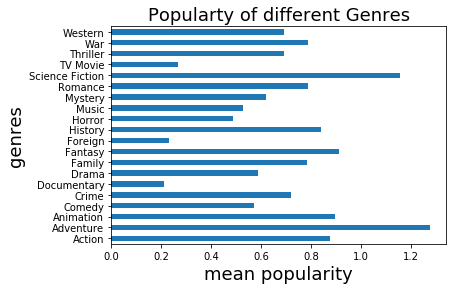

In [37]:
#exploring relationship between genres and popularity
df.groupby('genres_first').popularity.mean().plot(kind='barh')
plt.title('Popularty of different Genres',fontsize=18)
plt.ylabel('genres',fontsize=18)
plt.xlabel('mean popularity',fontsize=18)

The plot above shows that Adventure movies is the most popular type of movies.

<a id='conclusions'></a>
## Conclusions

First conclusion is that there is a postive corrlation between budget and revenue which means that movies with high budget often have high revenue.
Second conclusion is that revenues differ depending movies type,adventure movies have the largest revenues.
Third conclusion is popularity,budget and revenue are related and the three factors often rise together which represnts succeeded movie.
Fourth conclusion is that among different types of movies Drama movies is the most produced one.
Fifth conciusion is that the most popular type of movies is Adventure.
Finally,althogh Adventure  movies are the most populare type of movies,Drama movies is the most produced one .
Ithink that more information like marketing budget for every movie is important and makes the whole picture of analysis more clear.

Limitation:
runtime  is an important variable but there is no correlation between  it and revenue which is another anthor important variable.  

In [38]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0